In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [23]:
raw_data = pd.read_csv("./EmployeeAttrition.csv", index_col=0)

In [24]:
raw_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


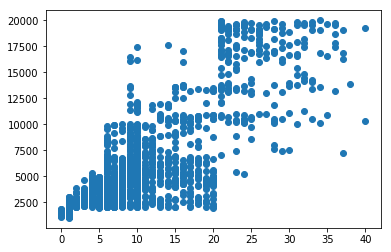

In [25]:
plt.scatter(raw_data["TotalWorkingYears"], raw_data["MonthlyIncome"])
plt.show()

In [26]:
two_mode_data = np.array(raw_data[["TotalWorkingYears", "MonthlyIncome"]])

In [27]:
kmeans_model = KMeans(n_clusters=3, random_state=100).fit(two_mode_data)

In [28]:
color_list = ["blue", "red", "yellow", "green", "black"]

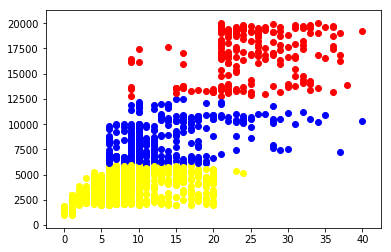

In [29]:
for value, label in zip(two_mode_data, kmeans_model.labels_):
    x = value[0]
    y = value[1]
    color = color_list[label]
    plt.scatter(x, y, color=color)
plt.show()

In [30]:
gmm_model = GaussianMixture(n_components=3, random_state=0).fit(two_mode_data)
gmm_labels = gmm_model.predict(two_mode_data)

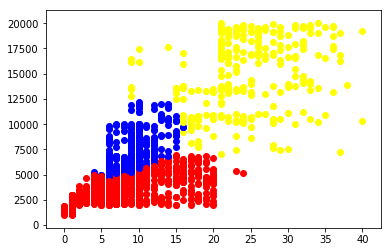

In [31]:
for value, label in zip(two_mode_data, gmm_labels):
    x = value[0]
    y = value[1]
    color = color_list[label]
    plt.scatter(x, y, color=color)
plt.show()